# ***C/NC DNA Detecting Code***

---



> This code to detect the coding and noncoding sequances (4-kmers) using chaos game representation, Chaos game representation (CGR) is an iterative mapping technique that assigns each nucleotide in a DNA sequence to a respective position on the plane in a one-to-one manner. 

In [1]:
#Importing_reqiured_libraries
%matplotlib inline
import numpy as np
import os
import imageio
import matplotlib.pylab as plt
import math
import pandas as pd
from collections import defaultdict
from pathlib import Path
from numpy.random import seed
import sys
import matplotlib.cm as cm
import pylab
ep = sys.float_info.epsilon
import seaborn as sn
from sklearn import metrics
from sklearn import model_selection
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Retrieve_the_data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Pre Step**:

We collected a total of 80 sequences as training data from 10 mammalian species(40 coding sequence and 40 non-coding intron parts) 

Gene names: CSN1S1, IL2, LCE6A and SMCP

We collected also total of 40 sequences as testing data from 10 mammalian species(20 coding sequence and 20 non-coding intron parts) 

Gene names: STK11 and TP53



after start anything, AND and after get data from NCBI we must create two lists : 

---



1. inp_out_needed list : contains all data frame that, we will create in the next step that contain coding & noncoding of train & test cgr images.

2. paths list : that contain path of each data (coding & noncoding of train & test cgr images) on your google drive.


 

In [3]:
inp_out_needed=['train_coding_df1','train_noncoding_df1','test_coding_df1','test_noncoding_df1']
paths={'train_coding_df1':'/content/drive/My Drive/project/ML_cgr_data/train/coding_seq','train_noncoding_df1':'/content/drive/My Drive/project/ML_cgr_data/train/non_codingseq','test_coding_df1':'/content/drive/My Drive/project/ML_cgr_data/test/coding','test_noncoding_df1':'/content/drive/My Drive/project/ML_cgr_data/test/noncoding'}

***First*** : read each CGR image and flat it to row in data frame to intilization machine learning processing


In [ ]:
# df_image is a subfunction to create data frame from read each CGR image where each row is one image

In [4]:
def df_image(Images):
  Images1=sorted(Images) # sort them ascendingly 
  ImagF=np.zeros((len(Images),497664))  # All Images
  for i in range(len(Images1)):
      ImagF_1=imageio.imread(Images1[i])
      ImagF[i,:]=ImagF_1.reshape((1,497664))
  return pd.DataFrame(ImagF)

***Second*** : Assgin class to coding and noncoding images to can make classification

In [ ]:
# clas_assign is a subfunction to assign class 1 (one) to each coding cgr images data frame and class 0 (zero) to  noncoding cgr images data frame

In [5]:
def clas_assign(Images,c,b):
  c= df_image(Images)
  if b.split('_')[1] =='coding':
    c['y']=np.ones((len(c)))
  elif b.split('_')[1] =='noncoding':
    c['y']=np.zeros((len(c)))
  return c

***Third***: Create Train & Test Data Frame that contain coding and noncoding images :

train data frame = train coding cgr image (with class one ) + train noncoding cgr image (with class zero )

 &
  test data frame = test coding cgr image (with class one ) + test noncoding cgr image (with class zero )
  
  
  By two step A & B & C

In [ ]:
#A- For loop to make data frame from taking different types of images (coding & noncoding) from different folder (tain & test)  

In [6]:
for c in inp_out_needed:
  b=c
  home_path = os.getcwd()
  path=paths[c]
  os.chdir(path)
  Images=os.listdir()
  exec('{} = clas_assign(Images,c,b)'.format(c))

In [ ]:
# B- Merge codind & noncoding traing data (after assign class to each one ) in one train data frame and
# codind & noncoding testing data (after assign class to each one ) in one test data frame 

In [7]:
# merge coding sequence of train data to noncoding sequence of train data to obtain training sequence data frame
train_coding_noncoding1=pd.concat([train_coding_df1,train_noncoding_df1])
# merge coding sequence of test data to noncoding sequence of test data to obtain testing sequence data frame
test_coding_noncoding1=pd.concat([test_coding_df1,test_noncoding_df1])

In [ ]:
# C - split train dataframe (from step B ) to X_train (data) & y_train (labeles) variables to can start machine learning classification

In [8]:
X_train=train_coding_noncoding1.iloc[:,:-1]
X_test=test_coding_noncoding1.iloc[:,:-1]
y_train=train_coding_noncoding1.iloc[:,-1]
y_test=test_coding_noncoding1.iloc[:,-1]

In [ ]:
# D- Statistical Data Analysis :

In [9]:
X_train_mean=np.mean(X_train)
print('mean = ',X_train_mean)
X_train_median=np.median(X_train)
print('median =',X_train_median)

mean =  0         255.0
1         255.0
2         255.0
3         255.0
4         255.0
          ...  
497659    255.0
497660    255.0
497661    255.0
497662    255.0
497663    255.0
Length: 497664, dtype: float64
median = 255.0


In [99]:
df_resultcol=['NaiveBayes','logistic regression','KNN','Perceptron','SVM','Combination']
df_resultrow=['Accuracy','Specificity','Precision','Sensitivity','Cross_Validation']

In [100]:
df_result=pd.DataFrame(columns=df_resultcol,index=df_resultrow)
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN
Specificity,NaN,NaN,NaN,NaN,NaN,NaN
Precision,NaN,NaN,NaN,NaN,NaN,NaN
Sensitivity,NaN,NaN,NaN,NaN,NaN,NaN
Cross_Validation,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# F- Statistical Data Analysis after Scalling:

In [12]:
X_train_mean=np.mean(X_train)
print('mean = ',X_train_mean)
X_train_median=np.median(X_train)
print('median =',X_train_median)

mean =  0         255.0
1         255.0
2         255.0
3         255.0
4         255.0
          ...  
497659    255.0
497660    255.0
497661    255.0
497662    255.0
497663    255.0
Length: 497664, dtype: float64
median = 255.0


***Forth*** : Apply different type of classification :

1- Naive Bayes Classifier (supervised linear classifier)

2- Logistic regression (supervised linear classifier)

3- k-nearst neighbor classifier ( supervised nonlinear classifier)

4- perceptron (supervised linear classifier)

5- SVM (Support Vector Machine ) (supervised classifier)



In [ ]:
#1- Naive Bayes Classifier

In [13]:
np.random.shuffle(train_coding_noncoding1)
np.random.shuffle(test_coding_noncoding1)

In [14]:
X_train=train_coding_noncoding1.iloc[:,:-1]
X_test=test_coding_noncoding1.iloc[:,:-1]
y_train=train_coding_noncoding1.iloc[:,-1]
y_test=test_coding_noncoding1.iloc[:,-1]

In [15]:
# E- feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [16]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_n = GaussianNB()

# Train the model using the training sets
model_n.fit(X_train, y_train)

#Predict Output
y_pred_nai = model_n.predict(X_test) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_naiv=confusion_matrix(y_test,y_pred_nai)
cm_naiv

array([[ 5, 15],
       [ 2, 18]])

In [18]:
#Sensitivity_(True positive rate TPR) 
TP_nav= cm_naiv[0][0]
FN_nav= cm_naiv[1][0]
TPR_nav= TP_nav/(TP_nav+FN_nav) * 100
print("Sensitivity "+str(TPR_nav)+'%')

Sensitivity 71.42857142857143%


In [19]:
#Specificity(Total Negative Result TNR)
TN_nav= cm_naiv[1][1]
FP_nav= cm_naiv[0][1] 
TNR_nav = TN_nav/(TN_nav+FP_nav) * 100
print("Specificity "+str(TNR_nav)+'%')

Specificity 54.54545454545454%


In [20]:
percision_nav=(TP_nav/(TP_nav+FP_nav))*100
percision_nav

25.0

Text(0.5, 1.0, 'Confusion Matrix Naive Bayes')

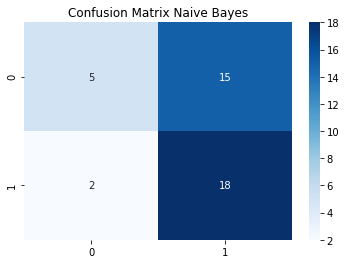

In [131]:
os.chdir(home_path)
cm_picture_nav=sn.heatmap(pd.DataFrame(cm_naiv),cmap="Blues", annot=True)
figure1 = cm_picture_nav.get_figure()   
plt.title("Confusion Matrix Naive Bayes")
figure1.savefig('/content/drive/My Drive/project/ML_cgr_data/Confusion_NaiveBayes_4kmers.jpg', dpi=400)

In [22]:
model_n.score(X_test, y_test)

0.575

In [23]:
#Calculate Accuracy and Print it
accu_navie=(sum([1 for i, j in zip(y_pred_nai, y_test) if i == j])/len(y_test))*100
print("Accuracy = " ,accu_navie, "%")

Accuracy =  57.49999999999999 %


In [24]:
# calculating the cross validation for a set of predictions:
results_naiv = model_selection.cross_val_score(model_n, X_train, y_train,cv=None)*100

In [101]:
df_result['NaiveBayes']=pd.Series({'Accuracy':accu_navie,'Cross_Validation':results_naiv,'Confusion_Matrix':cm_naiv,'Sensitivity':TPR_nav,'Specificity':TNR_nav,'Precision':percision_nav})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,57.5,NaN,NaN,NaN,NaN,NaN
Specificity,54.5455,NaN,NaN,NaN,NaN,NaN
Precision,25,NaN,NaN,NaN,NaN,NaN
Sensitivity,71.4286,NaN,NaN,NaN,NaN,NaN
Cross_Validation,"[87.5, 100.0, 93.75, 81.25, 62.5]",NaN,NaN,NaN,NaN,NaN


In [ ]:
#2- logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [27]:
np.random.shuffle(train_coding_noncoding1)
np.random.shuffle(test_coding_noncoding1)

In [28]:
X_train=train_coding_noncoding1.iloc[:,:-1]
X_test=test_coding_noncoding1.iloc[:,:-1]
y_train=train_coding_noncoding1.iloc[:,-1]
y_test=test_coding_noncoding1.iloc[:,-1]

In [29]:
clf =linear_model.LogisticRegression().fit(X_train, y_train)

In [30]:
y_pred_log1=clf.predict(X_test)

In [31]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_logistic=confusion_matrix(y_test,y_pred_log1)
cm_logistic

array([[20,  0],
       [ 3, 17]])

In [32]:
#Sensitivity_(True positive rate TPR) 
TP_log= cm_logistic[0][0]
FN_log= cm_logistic[1][0]
TPR_log= TP_log/(TP_log+FN_log) * 100
print("Sensitivity "+str(TPR_log)+'%')

Sensitivity 86.95652173913044%


In [33]:
#Specificity(Total Negative Result TNR)
TN_log= cm_logistic[1][1]
FP_log= cm_logistic[0][1] 
TNR_log = TN_log/(TN_log+FP_log) * 100
print("Specificity "+str(TNR_log)+'%')

Specificity 100.0%


In [34]:
percision_log=(TP_log/(TP_log+FP_log))*100
percision_log

100.0

Text(0.5, 1.0, 'Confusion Matrix Logistic Regression')

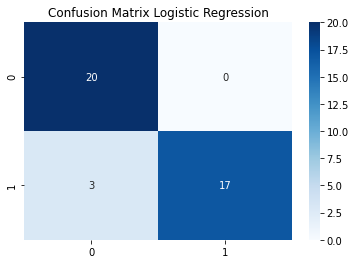

In [132]:
os.chdir(home_path)
cm_picture_logistic=sn.heatmap(pd.DataFrame(cm_logistic),cmap="Blues", annot=True)
figure2 = cm_picture_logistic.get_figure()   
plt.title("Confusion Matrix Logistic Regression")
figure2.savefig('/content/drive/My Drive/project/ML_cgr_data/Confusion_Logistic_4kmers.jpg', dpi=400)

In [36]:
#Calculate Accuracy and Print it
accu_log=(sum([1 for i, j in zip(y_pred_log1, y_test) if i == j])/len(y_test))*100
print("Accuracy = " ,accu_log, "%")

Accuracy =  92.5 %


In [37]:
clf.score(X_test, y_test)

0.925

In [38]:
# calculating the cross validation for a set of predictions:
results_log = model_selection.cross_val_score(clf, X_train, y_train,cv=5 )*100
results_log

array([ 93.75, 100.  , 100.  , 100.  , 100.  ])

In [102]:
df_result['logistic regression']=pd.Series({'Accuracy': accu_log,'Cross_Validation':results_log,'Confusion_Matrix':cm_logistic,'Sensitivity':TPR_log,'Specificity':TNR_log,'Precision':percision_log})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,57.5,92.5,NaN,NaN,NaN,NaN
Specificity,54.5455,100,NaN,NaN,NaN,NaN
Precision,25,100,NaN,NaN,NaN,NaN
Sensitivity,71.4286,86.9565,NaN,NaN,NaN,NaN
Cross_Validation,"[87.5, 100.0, 93.75, 81.25, 62.5]","[93.75, 100.0, 100.0, 100.0, 100.0]",NaN,NaN,NaN,NaN


In [ ]:
# 3- KNN:

In [41]:
np.random.shuffle(train_coding_noncoding1)
np.random.shuffle(test_coding_noncoding1)

In [42]:
X_train=train_coding_noncoding1.iloc[:,:-1]
X_test=test_coding_noncoding1.iloc[:,:-1]
y_train=train_coding_noncoding1.iloc[:,-1]
y_test=test_coding_noncoding1.iloc[:,-1]

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
neigh = KNeighborsClassifier(n_neighbors=25, metric= 'euclidean')
neigh.fit(X_train, y_train)

preds1 = neigh.predict(X_test)
preds1.shape


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

(40,)

In [44]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test,preds1)
cm_knn

array([[13,  7],
       [ 0, 20]])

In [45]:
#Sensitivity_(True positive rate TPR) 
TP_knn= cm_knn[0][0]
FN_knn= cm_knn[1][0]
TPR_knn= TP_knn/(TP_knn+FN_knn) * 100
print("Sensitivity "+str(TPR_knn)+'%')

Sensitivity 100.0%


In [46]:
#Specificity(Total Negative Result TNR)
TN_knn= cm_knn[1][1]
FP_knn= cm_knn[0][1] 
TNR_knn = TN_knn/(TN_knn+FP_knn) * 100
print("Specificity "+str(TNR_knn)+'%')

Specificity 74.07407407407408%


In [47]:
percision_knn=(TP_knn/(TP_knn+FP_knn))*100
percision_knn

65.0

Text(0.5, 1.0, 'Confusion Matrix KNN')

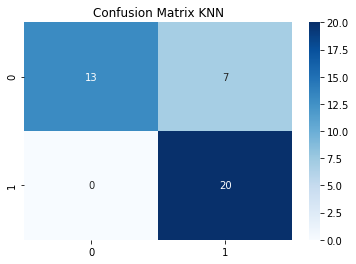

In [133]:
os.chdir(home_path)
cm_picture2=sn.heatmap(pd.DataFrame(cm_knn),cmap="Blues", annot=True)
figure3 = cm_picture2.get_figure()   
plt.title("Confusion Matrix KNN")
figure3.savefig('/content/drive/My Drive/project/ML_cgr_data/Confusion_KNN_4kmers.jpg', dpi=400)

In [49]:
#Calculate Accuracy and Print it
accu_knn=(sum([1 for i, j in zip(preds1, y_test) if i == j])/len(y_test))*100
print("Accuracy = " ,accu_knn, "%")

Accuracy =  82.5 %


In [50]:
neigh.score(X_test, y_test)

0.825

In [51]:
# calculating the cross validation for a set of predictions:
results_knn= model_selection.cross_val_score(neigh, X_train, y_train,cv=5 )*100
results_knn

array([56.25, 56.25, 75.  , 87.5 , 75.  ])

In [103]:
df_result['KNN']=pd.Series({'Accuracy':accu_knn,'Cross_Validation':results_knn,'Confusion_Matrix':cm_knn,'Sensitivity':TPR_knn,'Specificity':TNR_knn,'Precision':percision_knn})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,57.5,92.5,82.5,NaN,NaN,NaN
Specificity,54.5455,100,74.0741,NaN,NaN,NaN
Precision,25,100,65,NaN,NaN,NaN
Sensitivity,71.4286,86.9565,100,NaN,NaN,NaN
Cross_Validation,"[87.5, 100.0, 93.75, 81.25, 62.5]","[93.75, 100.0, 100.0, 100.0, 100.0]","[56.25, 56.25, 75.0, 87.5, 75.0]",NaN,NaN,NaN


In [ ]:
# 4- Perceptron

In [53]:
np.random.shuffle(train_coding_noncoding1)
np.random.shuffle(test_coding_noncoding1)

In [54]:
X_train=train_coding_noncoding1.iloc[:,:-1]
X_test=test_coding_noncoding1.iloc[:,:-1]
y_train=train_coding_noncoding1.iloc[:,-1]
y_test=test_coding_noncoding1.iloc[:,-1]

In [55]:
from sklearn.linear_model import Perceptron
per=Perceptron(max_iter=100, eta0=0.01,shuffle=True)
per.fit(X_train, y_train)
Test_y=pd.Series(per.predict(X_test), name='y')

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_per=confusion_matrix(y_test,Test_y)
cm_per

array([[20,  0],
       [ 3, 17]])

In [57]:
#Sensitivity_(True positive rate TPR) 
TP_per= cm_per[0][0]
FN_per= cm_per[1][0]
TPR_per= TP_per/(TP_per+FN_per) * 100
print("Sensitivity "+str(TPR_per)+'%')

Sensitivity 86.95652173913044%


In [58]:
#Specificity(Total Negative Result TNR)
TN_per= cm_per[1][1]
FP_per= cm_per[0][1] 
TNR_per = TN_per/(TN_per+FP_per) * 100
print("Specificity "+str(TNR_per)+'%')

Specificity 100.0%


In [59]:
percision_per=(TP_per/(TP_per+FP_per))*100
percision_per

100.0

Text(0.5, 1.0, 'Confusion Matrix Perceptron')

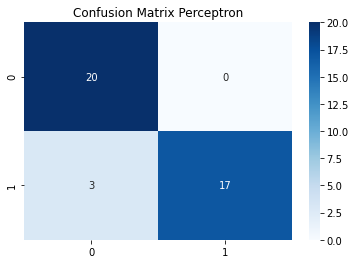

In [134]:
os.chdir(home_path)
cm_picture4=sn.heatmap(pd.DataFrame(cm_per),cmap="Blues", annot=True)
figure4 = cm_picture4.get_figure()   
plt.title("Confusion Matrix Perceptron")
figure4.savefig('/content/drive/My Drive/project/ML_cgr_data/Confusion_Perceptron_4kmers.jpg', dpi=400)

In [61]:
per.score(X_test, y_test)

0.925

In [71]:
#Calculate Accuracy and Print it
accu_per=(sum([1 for i, j in zip(Test_y, y_test) if i == j])/len(y_test))*100
print("Accuracy = " ,accu_per, "%")
acc_per2=((TP_per+TN_per)/(TP_per+FP_per+FN_per+TN_per))*100 # another way
acc_per2

Accuracy =  92.5 %


92.5

In [65]:
# calculating the cross validation for a set of predictions:
results_per = model_selection.cross_val_score(per, X_train, y_train,cv=5)*100
results_per

array([ 68.75, 100.  ,  93.75, 100.  ,  93.75])

In [104]:
df_result['Perceptron']=pd.Series({'Accuracy':accu_per,'Cross_Validation':results_per,'Confusion_Matrix':cm_per,'Sensitivity':TPR_per,'Specificity':TNR_per,'Precision':percision_per})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,57.5,92.5,82.5,92.5,NaN,NaN
Specificity,54.5455,100,74.0741,100,NaN,NaN
Precision,25,100,65,100,NaN,NaN
Sensitivity,71.4286,86.9565,100,86.9565,NaN,NaN
Cross_Validation,"[87.5, 100.0, 93.75, 81.25, 62.5]","[93.75, 100.0, 100.0, 100.0, 100.0]","[56.25, 56.25, 75.0, 87.5, 75.0]","[68.75, 100.0, 93.75, 100.0, 93.75]",NaN,NaN


In [ ]:
# 5- Support Vector Machine(SVM)

In [67]:
np.random.shuffle(train_coding_noncoding1)
np.random.shuffle(test_coding_noncoding1)

In [68]:
X_train=train_coding_noncoding1.iloc[:,:-1]
X_test=test_coding_noncoding1.iloc[:,:-1]
y_train=train_coding_noncoding1.iloc[:,-1]
y_test=test_coding_noncoding1.iloc[:,-1]

In [69]:
# Create Linear SVM object
from sklearn import svm
support = svm.LinearSVC(random_state=20)

In [70]:
# Train the model using the training sets and check score on test dataset
from sklearn.metrics import accuracy_score
support.fit(X_train, y_train)
predicted= support.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
          verbose=0)

In [72]:
score_svm1=support.score(X_test, y_test) # method 1 to calculate accuracy of svm model
score_svm2=accuracy_score(y_test,predicted)  # method 2 to calculate accuracy of svm model
#Calculate Accuracy and Print it by method3
accu_svm=(sum([1 for i, j in zip(predicted, y_test) if i == j])/len(y_test))*100
print("Your Model Accuracy is", score_svm1*100,score_svm2*100,accu_svm)

Your Model Accuracy is 95.0 95.0 95.0


In [73]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_svm=confusion_matrix(y_test,predicted)
cm_svm

array([[20,  0],
       [ 2, 18]])

In [74]:
#Sensitivity_(True positive rate TPR) 
TP_svm= cm_svm[0][0]
FN_svm= cm_svm[1][0]
TPR_svm= TP_svm/(TP_svm+FN_svm) * 100
print("Sensitivity "+str(TPR_svm)+'%')

Sensitivity 90.9090909090909%


In [75]:
#Specificity(Total Negative Result TNR)
TN_svm= cm_svm[1][1]
FP_svm= cm_svm[0][1] 
TNR_svm = TN_svm/(TN_svm+FP_svm) * 100
print("Specificity "+str(TNR_svm)+'%')

Specificity 100.0%


In [76]:
float32_epsilon = np.finfo(np.float32).eps
percision_svm_=(TP_svm/(TP_svm+FP_svm)+float32_epsilon)*100
percision_svm_

100.00001192092896

Text(0.5, 1.0, 'Confusion Matrix SVM')

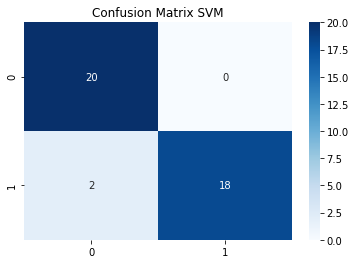

In [77]:
os.chdir(home_path)
cm_picture5=sn.heatmap(pd.DataFrame(cm_svm),cmap="Blues", annot=True)
figure5 = cm_picture5.get_figure()   
plt.title("Confusion Matrix SVM")
figure5.savefig('/content/drive/My Drive/project/ML_cgr_data/Confusion_SVM_4kmers.jpg', dpi=400)

In [78]:
# calculating the mean R^2 for a set of predictions:
results_svm = model_selection.cross_val_score(support, X_train, y_train,cv=5, scoring='r2')*100
results_svm

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

array([ 75., 100., 100., 100., 100.])

In [105]:
df_result['SVM']=pd.Series({'Accuracy':accu_svm,'Cross_Validation':results_svm,'Confusion_Matrix':cm_svm,'Sensitivity':TPR_svm,'Specificity':TNR_svm,'Precision':percision_svm_})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,57.5,92.5,82.5,92.5,95,NaN
Specificity,54.5455,100,74.0741,100,100,NaN
Precision,25,100,65,100,100,NaN
Sensitivity,71.4286,86.9565,100,86.9565,90.9091,NaN
Cross_Validation,"[87.5, 100.0, 93.75, 81.25, 62.5]","[93.75, 100.0, 100.0, 100.0, 100.0]","[56.25, 56.25, 75.0, 87.5, 75.0]","[68.75, 100.0, 93.75, 100.0, 93.75]","[75.0, 100.0, 100.0, 100.0, 100.0]",NaN


# Fifth: Model Selection

In This study we try to select best model for coding/noncoding DNA detection by two methods:
1. from built in outsource function from (https://scipy-lectures.org/packages/scikit-learn/index.html)
2. aggergate above result from each model in new data frame called **df_result**

In [ ]:
# 1. outsourcing code

In [80]:
from sklearn import model_selection
from sklearn import metrics
for Model in [GaussianNB, LogisticRegression,KNeighborsClassifier,Perceptron,svm.LinearSVC]:
    clfsa = Model().fit(X_train, y_train)
    y_pred_model = clfsa.predict(X_test)
    print('%s: %s' % 
          (Model.__name__, metrics.f1_score(y_pred_model, y_test, average="macro"))) 

GaussianNB: 0.5248078266946192
LogisticRegression: 0.9245757385292268
KNeighborsClassifier: 0.37321937321937326
Perceptron: 0.9245757385292268


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC: 0.9245757385292268


In [ ]:
# 2. Create df_result to collect result on it:

In [106]:
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,57.5,92.5,82.5,92.5,95,NaN
Specificity,54.5455,100,74.0741,100,100,NaN
Precision,25,100,65,100,100,NaN
Sensitivity,71.4286,86.9565,100,86.9565,90.9091,NaN
Cross_Validation,"[87.5, 100.0, 93.75, 81.25, 62.5]","[93.75, 100.0, 100.0, 100.0, 100.0]","[56.25, 56.25, 75.0, 87.5, 75.0]","[68.75, 100.0, 93.75, 100.0, 93.75]","[75.0, 100.0, 100.0, 100.0, 100.0]",NaN


## Sixth : Merging the three best together(SVM,Logistic regression and Perceptron):

In [84]:
X_train=train_coding_noncoding1.iloc[:,:-1]
X_test=test_coding_noncoding1.iloc[:,:-1]
y_train=train_coding_noncoding1.iloc[:,-1]
y_test=test_coding_noncoding1.iloc[:,-1]

In [82]:
from sklearn.ensemble import VotingClassifier
combo = VotingClassifier([('lsvc', svm.LinearSVC()),
                            ('lr', linear_model.LogisticRegression()),
                            ('per', Perceptron())])

In [86]:
combo.fit(X_train, y_train)
y_pre_combo= combo.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('lsvc',
                              LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)),
                             ('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1...
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('pe

In [87]:
#Calculate Accuracy and Print it by method3
accu_combo=(sum([1 for i, j in zip(y_pre_combo, y_test) if i == j])/len(y_test))*100
print("Your Model Accuracy is", accu_combo)

Your Model Accuracy is 92.5


In [88]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_combo=confusion_matrix(y_test,y_pre_combo)
cm_combo

array([[20,  0],
       [ 3, 17]])

In [89]:
#Sensitivity_(True positive rate TPR) 
TP_combo= cm_combo[0][0]
FN_combo= cm_combo[1][0]
TPR_combo= TP_combo/(TP_combo+FN_combo) * 100
print("Sensitivity "+str(TPR_combo)+'%')

Sensitivity 86.95652173913044%


In [90]:
#Specificity(Total Negative Result TNR)
TN_combo= cm_combo[1][1]
FP_combo= cm_combo[0][1] 
TNR_combo = TN_combo/(TN_combo+FP_combo) * 100
print("Specificity "+str(TNR_combo)+'%')

Specificity 100.0%


In [91]:
percision_combo=(TP_combo/(TP_combo+FP_svm))*100
percision_combo

100.0

Text(0.5, 1.0, 'Confusion Matrix COMBO (SVM+Logistic+Perceptron)')

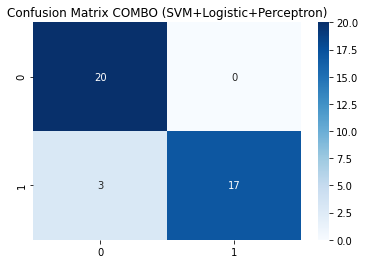

In [135]:
os.chdir(home_path)
cm_picture6=sn.heatmap(pd.DataFrame(cm_combo),cmap="Blues", annot=True)
figure6 = cm_picture6.get_figure()   
plt.title("Confusion Matrix COMBO (SVM+Logistic+Perceptron)")
figure6.savefig('/content/drive/My Drive/project/ML_cgr_data/Confusion_combo.jpg', dpi=400)

In [93]:
# calculating the mean R^2 for a set of predictions:
results_combo = model_selection.cross_val_score(combo, X_train, y_train,cv=5, scoring='r2')*100
results_combo

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

array([ 75., 100., 100., 100., 100.])

In [107]:
df_result['Combination']=pd.Series({'Accuracy':accu_combo,'Cross_Validation':results_combo,'Confusion_Matrix':cm_combo,'Sensitivity':TPR_combo,'Specificity':TNR_combo,'Precision':percision_combo})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,57.5,92.5,82.5,92.5,95,92.5
Specificity,54.5455,100,74.0741,100,100,100
Precision,25,100,65,100,100,100
Sensitivity,71.4286,86.9565,100,86.9565,90.9091,86.9565
Cross_Validation,"[87.5, 100.0, 93.75, 81.25, 62.5]","[93.75, 100.0, 100.0, 100.0, 100.0]","[56.25, 56.25, 75.0, 87.5, 75.0]","[68.75, 100.0, 93.75, 100.0, 93.75]","[75.0, 100.0, 100.0, 100.0, 100.0]","[75.0, 100.0, 100.0, 100.0, 100.0]"


Text(0.5, 1.0, 'Cross Validatio summary')

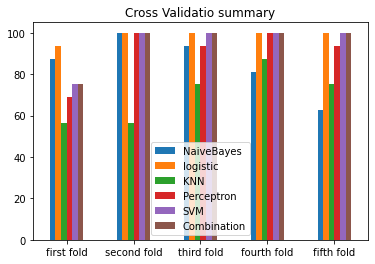

In [144]:
# plot all Cross Validation of five models and combination
Cross_Validation_nav=df_result.loc['Cross_Validation']['NaiveBayes']
Cross_Validation_log=df_result.loc['Cross_Validation']['logistic regression']
Cross_Validation_knn=df_result.loc['Cross_Validation']['KNN'] # Recall
Cross_Validation_per=df_result.loc['Cross_Validation']['Perceptron']
Cross_Validation_svm=df_result.loc['Cross_Validation']['SVM']
Cross_Validation_combo=df_result.loc['Cross_Validation']['Combination']
index=['first fold', 'second fold', 'third fold', 'fourth fold', 'fifth fold']
df_cross = pd.DataFrame({'NaiveBayes': Cross_Validation_nav,'logistic':Cross_Validation_log,'KNN': Cross_Validation_knn,'Perceptron':Cross_Validation_per,'SVM': Cross_Validation_svm,'Combination':Cross_Validation_combo}, index=index)
axx = df_cross.plot.bar(rot=0)
figure7 = axx.get_figure()   
plt.title("Cross Validatio summary")
figure7.savefig('/content/drive/My Drive/project/ML_cgr_data/Cross_Validatio_summary.jpg', dpi=400)

Text(0.5, 1.0, 'Summary')

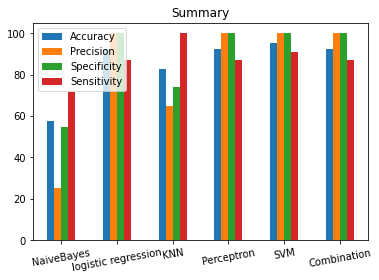

In [143]:
Accuracy=df_result.loc['Accuracy']
Sensitivity=df_result.loc['Sensitivity'] # Recall
Specificity=df_result.loc['Specificity']
Precision=df_result.loc['Precision']
index2=['NaiveBayes','logistic regression', 'KNN', 'Perceptron', 'SVM','Combination']
df2 = pd.DataFrame({'Accuracy': Accuracy,'Precision':Precision,'Specificity': Specificity,'Sensitivity': Sensitivity}, index=index2)
ax2 = df2.plot.bar(rot=10)
figure8 = ax2.get_figure()   
plt.title("Summary")
figure8.savefig('/content/drive/My Drive/project/ML_cgr_data/Summary.jpg', dpi=400)

# **Conclusion**:

In conclusion, from point 1 and 2 , from Accuracy, Sensitivity, and cross validation the SVM (Support Vector Machine) is the best.

So, In this study we devised **SVM** , **logistic regression** and **Perceptron** are good in coding \ noncoding DNA sequences detection, may be because the support vector machines is a class classification method introduced in the context of statistical learning theory and structural risk minimization, where An SVM model is a representation training datasets as points in space, mapped so that the training data of the separate categories are divided by a clear gap that is as wide as possible. testing data are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they lay, and because the SVM can be used for classification or regression problems,by using kernal function transform to find optimal decision boundary,where it can capture much more complex relationships between your datapoints without having to perform difficult transformations on your own, and SVM is good for image analysis tasks, such as image classification, Also,  Logistic regression and Perceptron appear good results, So we try to merging the three best together(SVM,Logistic regression and Perceptron) in one model called combo and give criteria like Logistic regression and Perceptron.